In [89]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns; sns.set()

from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<img src='./imgs/exe3_1.png' style=''>

### Gerando Dados 01

In [3]:

x = np.arange(1,25) # pontos x, (arbitrário), para definição da reta
print('Pontos x: ', x)

Pontos x:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [4]:

beta = np.array([4,1.5]) #coeficiente linear e angular, respectivamente. y = 1.5x + 4

X = np.array([np.ones(len(x)), x]); # X = [[1,1,...,1],[x]]
X = np.vstack(X); #X = [[1,1,...,1],
                   #   [x]]

X = X.T; # X = [[1,x[0]],[1,x[1]],...], array para cálculo de y
print('X:\n', X)

X:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]]


In [5]:

mu = np.matmul(X, beta) # produto escalar entre X e beta, Ex: [1,5]*[4,1.5] = 4 + 5(1.5) = 5(1.5) + 4, y = ax + b, ou seja, equação da reta


# O erro que deve ser introduzido nos dados é dado por: N(0,σ² = 25
sigma = 5 #desvio padrão devido ao erro que deve ser introduzido nos dados gerados
epsilon = norm.rvs(size=(len(x)), loc=0, scale=sigma) # gerando dados com o erro estabelecido

y = mu + epsilon # vetor com valores de y, dado por mu + o erro gerado

In [6]:
#print('mu: ', mu, end='\n\n')
#print('y: ', y)

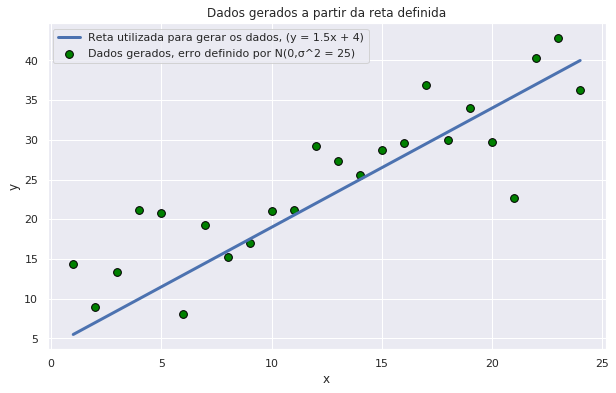

In [7]:

#plotagem dados gerados e reta utilizada para gerar os dados

fig = plt.figure(figsize=(10,6))
plt.scatter(x,y, color='green', label='Dados gerados, erro definido por N(0,σ^2 = 25)', edgecolor='black', s=60)
plt.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados gerados a partir da reta definida')
plt.legend()
#plt.xlim(0,max(x)+1); plt.ylim(0, max(y)+1) # redesenhando plot com outros limites
plt.show()



In [8]:

# gerando matrix de correlação: x,y
matCor = np.corrcoef(x, y); matCor

array([[1.        , 0.86932692],
       [0.86932692, 1.        ]])

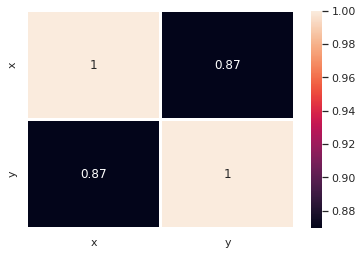

In [9]:

# plotagem matrix de correlação

#sns.set()
sns.heatmap(matCor, annot=True, linewidths=2, xticklabels=['x','y'], yticklabels=['x','y'])
plt.show()


In [10]:

#x.shape
#x.reshape(-1,2).shape
#x.reshape(-1,1) equivale á x.[:, np.newaxis], necessário para entrada da função .fit (2D)


In [11]:

# Aplicando o mdelo de regressão linear do sklearn

linear_model = LinearRegression()
linear_model.fit(x[:, np.newaxis], y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:

# coeficientes angular e linear preditos

print('Coeficiente angular predito: ', linear_model.coef_[0])
print('Coeficiente linear predito: ', linear_model.intercept_)

Coeficiente angular predito:  1.1629319866366288
Coeficiente linear predito:  10.215348462244648


Observa-se que os valores preditos pelo modelo de regressão linear são próximos dos valores utilizados para gerar os dados.

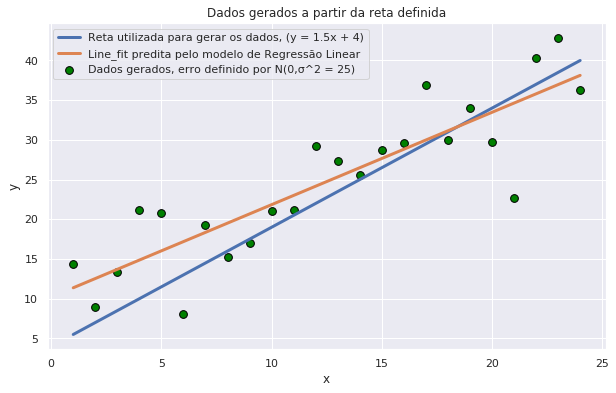

In [13]:


fig = plt.figure(figsize=(10,6))

plt.scatter(x,y, color='green', label='Dados gerados, erro definido por N(0,σ^2 = 25)', edgecolor='black', s=60)
plt.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
plt.plot(x, (linear_model.coef_[0]*x + linear_model.intercept_), lw=3, label='Line_fit predita pelo modelo de Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados gerados a partir da reta definida')
plt.legend()
plt.show()



### Gerando dados 02

Gerando dados como anteriormente feito mas com erro dado por N(0,1).

In [14]:

sigma_2 = 1
epsilon_2 = norm.rvs(size=len(x), loc=0, scale=sigma_2)

y2 = mu + epsilon_2 # dados com novo erro dado por N(0,1)

In [15]:

#Aplicando modelo de regressão linear a esses novos dados gerados

linear_model2 = LinearRegression()
linear_model2.fit(x[:, np.newaxis], y2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:

print('Coeficiente angular predito: ', linear_model2.coef_[0])
print('Coeficiente linear predito: ', linear_model2.intercept_)


Coeficiente angular predito:  1.5144150545819963
Coeficiente linear predito:  3.7690158536794947


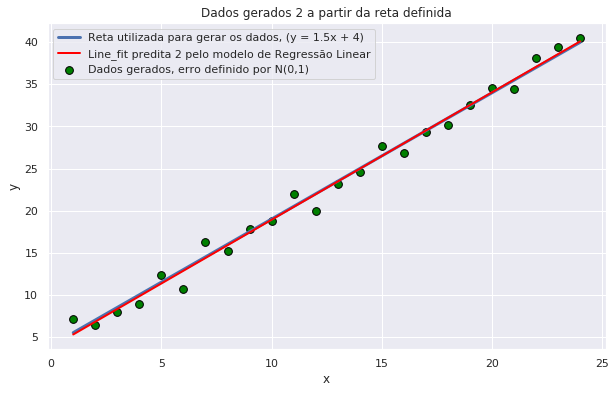

In [17]:

#plotagem dados gerados e reta utilizada para gerar os dados

fig = plt.figure(figsize=(10,6))

plt.scatter(x,y2, color='green', label='Dados gerados, erro definido por N(0,1)', edgecolor='black', s=60)
plt.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
plt.plot(x, (linear_model2.coef_[0]*x + linear_model2.intercept_), color='red',lw=2, label='Line_fit predita 2 pelo modelo de Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados gerados 2 a partir da reta definida')
plt.legend()
plt.show()


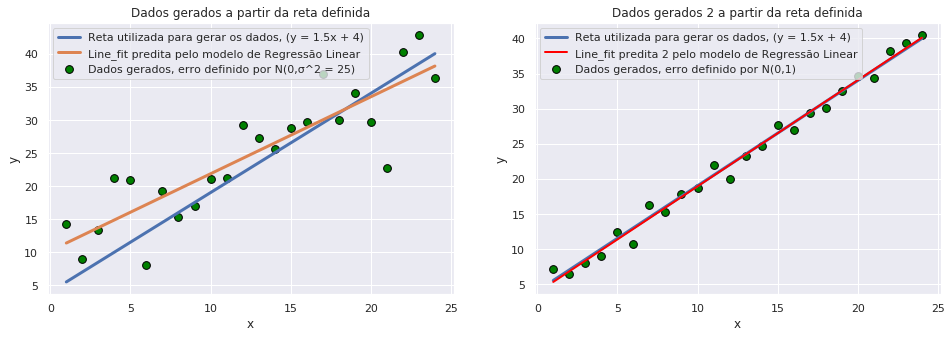

In [18]:


# Plotando os dois conjunto de dados e o modelo de regressão linear gerado

fig, (axe1,axe2) = plt.subplots(1,2, figsize=(16,5))

axe1.scatter(x,y, color='green', label='Dados gerados, erro definido por N(0,σ^2 = 25)', edgecolor='black', s=60)
axe1.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
axe1.plot(x, (linear_model.coef_[0]*x + linear_model.intercept_), lw=3, label='Line_fit predita pelo modelo de Regressão Linear')
axe1.set_xlabel('x')
axe1.set_ylabel('y')
axe1.set_title('Dados gerados a partir da reta definida')
axe1.legend()

axe2.scatter(x,y2, color='green', label='Dados gerados, erro definido por N(0,1)', edgecolor='black', s=60)
axe2.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
axe2.plot(x, (linear_model2.coef_[0]*x + linear_model2.intercept_), color='red',lw=2, label='Line_fit predita 2 pelo modelo de Regressão Linear')
axe2.set_xlabel('x')
axe2.set_ylabel('y')
axe2.set_title('Dados gerados 2 a partir da reta definida')
axe2.legend(loc='upper left')


plt.show()

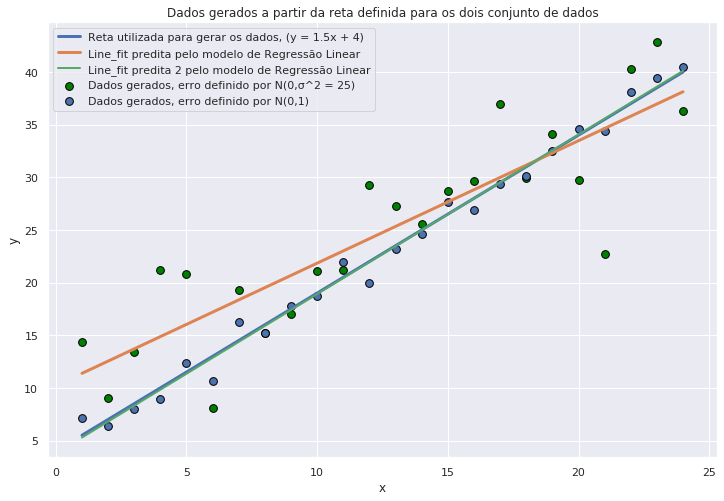

In [19]:

# os dois conjunto de dados em um mesmo plot


fig, axe = plt.subplots(figsize=(12,8))

#dados1
axe.scatter(x,y, color='green', label='Dados gerados, erro definido por N(0,σ^2 = 25)', edgecolor='black', s=60)
axe.plot(x, (beta[1]*x + beta[0]), lw=3, label='Reta utilizada para gerar os dados, (y = 1.5x + 4)')
axe.plot(x, (linear_model.coef_[0]*x + linear_model.intercept_), lw=3, label='Line_fit predita pelo modelo de Regressão Linear')

#dados2
axe.scatter(x,y2, label='Dados gerados, erro definido por N(0,1)', edgecolor='black', s=60)
axe.plot(x, (linear_model2.coef_[0]*x + linear_model2.intercept_),lw=2, label='Line_fit predita 2 pelo modelo de Regressão Linear')

axe.set_xlabel('x')
axe.set_ylabel('y')
axe.set_title('Dados gerados a partir da reta definida para os dois conjunto de dados')
axe.legend()

plt.show()



### Gerando n amostras de dados

In [91]:


# Gerando n amostras de dados 
# O erro associado a cada amostra segue a v.a. N(0,σ^2 = 25), observe que esse é um valor aleátorio devido 
# ao parâmetro random_state não ser definido em norm.rvs. 
# O objetivo é gerar n amostras para verifiar o comportamento do erro associado ao uso do modelo de 
# regressão linear.

nAmostras = 1000
size_amostra = 24

coefBeta = [] # armazena os coeficientes linear e angular, respectivamente, de cada amostra gerada
r2 = [] # armazena r2 score, uma das metricas usadas para medir erro associado ao modelo de regressao linear
s2 = [] # MSE

for a in range(nAmostras):  
    
    norm_rvs = norm.rvs(size=size_amostra, loc=0, scale=sigma) # gerando v.a. com distribuição N(0,σ^2 = 25). Erro associado. 
    
    y = mu + norm_rvs; # gerando dados y com o erro associado a variável aleatória acima.
    
    model_linear = LinearRegression().fit(x[:, np.newaxis],y) # aplicando o modelo de regressão linear a amostra gerada
    coefBeta.append([model_linear.intercept_, model_linear.coef_[0]]) # armazeando os coeficientes, linear e angular, do modelo gerado.
    
    
    y_pred = (model_linear.intercept_ + model_linear.coef_[0]*x)
    
    r2.append(r2_score(y, y_pred)) # r2_score(y_true, y_pred)
    s2.append(mean_squared_error(y, y_pred))


In [97]:
# transformando coefBeta em um np.array e remodelando para um novo formato de dimensão
coefBeta = np.array(coefBeta).reshape(-1,2); #coefBeta[:,1]

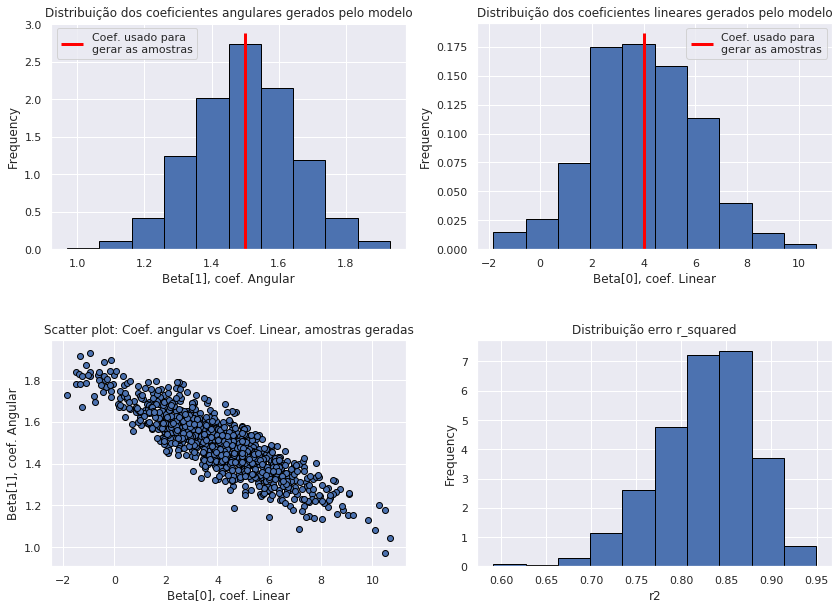

In [98]:

# Algumas plotagens


fig, ([axe1,axe2],[axe3,axe4]) = plt.subplots(2,2, figsize=(14,10))
fig.subplots_adjust(hspace=0.4)

axe1.hist(coefBeta[:,1], density=True, edgecolor='black') # distribuição dos coeficientes
axe1.vlines(beta[1], 0, axe1.get_ylim()[1], lw=3, color='red', label='Coef. usado para\ngerar as amostras') # real valor do coef. angular, usado para gerar as amostras
axe1.set_title('Distribuição dos coeficientes angulares gerados pelo modelo')
axe1.set_xlabel('Beta[1], coef. Angular')
axe1.set_ylabel('Frequency')
axe1.legend()

axe2.hist(coefBeta[:,0], density=True, edgecolor='black') # distribuição dos coeficientes
axe2.vlines(beta[0], 0, axe2.get_ylim()[1], lw=3, color='red', label='Coef. usado para\ngerar as amostras') # real valor do coef. linear, usado para gerar as amostras
axe2.set_title('Distribuição dos coeficientes lineares gerados pelo modelo')
axe2.set_xlabel('Beta[0], coef. Linear')
axe2.set_ylabel('Frequency')
axe2.legend()

axe3.scatter(coefBeta[:,0],coefBeta[:,1], edgecolor='black') # scatter plot
axe3.set_title('Scatter plot: Coef. angular vs Coef. Linear, amostras geradas')
axe3.set_xlabel('Beta[0], coef. Linear')
axe3.set_ylabel('Beta[1], coef. Angular')

axe4.hist(r2, density=True, edgecolor='black') # distribuição dos erros r2_squared gerados
axe4.set_title('Distribuição erro r_squared')
axe4.set_xlabel('r2')
axe4.set_ylabel('Frequency')


plt.show()


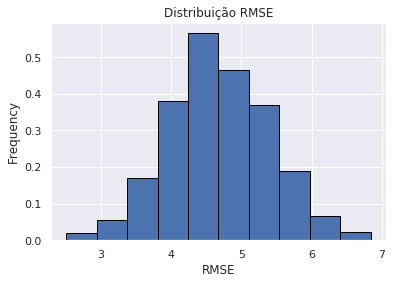

In [95]:

fig, axe = plt.subplots()

axe.hist(np.sqrt(s2), density=True, edgecolor='black') # distribuição dos erros r2_squared gerados
axe.set_title('Distribuição RMSE')
axe.set_xlabel('RMSE')
axe.set_ylabel('Frequency')

plt.show()


In [105]:

print('Média Beta[0], Coef. Linear: {0:.2f}'.format(coefBeta[:,0].mean()))
print('Média Beta[1], Coef. Angular: {0:.2f}'.format(coefBeta[:,1].mean()))
print('Média r2,: {0:.2f}'.format(np.mean(r2)))
print('Média RMSE,: {0:.2f}'.format(np.mean(np.sqrt(s2)))) # Estimador para desvio padrão que gerou os dados

Média Beta[0], Coef. Linear: 3.99
Média Beta[1], Coef. Angular: 1.50
Média r2,: 0.83
Média RMSE,: 4.68


Abaixo é apresentado alguns comentários importantes realizado pelo professor da disciplina, Renato Assunção, que pode ser encontrado nas referências [2], [3] e [4]. Observe que o atributo x1 é referente ao atributo x, usado no presente trabalho.

<img src='./imgs/exe3_2.png' style=''>

<img src='./imgs/exe3_3.png' style=''>

<img src='./imgs/exe3_4.png' style=''>

<img src='./imgs/exe3_5.png' style=''>

<img src='./imgs/exe3_6.png' style=''>

In [ ]:
#help(LinearRegression)

## References

[1]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
<br>
[2]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[3]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf Cap. Regressão
<br>
[4]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/material.html
<br>
[5]https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does
<br>
[6]https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
<br>